<a href="https://colab.research.google.com/github/ayushbhotika/loanStatusPrediction/blob/main/Loan_Status_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Loan Status Prediction Project**

This project aims to predict loan approval status using classification models on a dataset containing applicant information.

Key aspects of this project include:

- **Addressing Class Imbalance:** Utilizing SMOTE to handle the unequal distribution of loan approval outcomes.

- **Model Implementation:** Building and evaluating Logistic Regression that provides interpretability and helps identify significant factors influencing loan status,  and Decision Tree classifiers for capturing non-linear patterns and interactions between features.

- **Performance Evaluation:** Assessing models using metrics like Accuracy, Precision, Recall, F1-score, and ROC-AUC to understand the trade-offs between interpretability and predictive performance.

- **Insights:** Identifying significant factors for loan approval and demonstrating how machine learning can aid financial decision-making.


# **Loading the dataset**

In [121]:
import pandas as pd

file_path = '/content/Loan_Default_Dataset.xlsx'
df = pd.read_excel(file_path)
display(df.head())


,Loan_ID,LoanAmount,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,3509.4,1,0,0,1,0,5849,0.0,360,1,1,Y
1,LP001003,128.0,1,1,1,1,0,4583,1508.0,360,1,3,N
2,LP001005,66.0,1,1,0,1,1,3000,0.0,360,1,1,Y
3,LP001006,120.0,1,1,0,2,0,2583,2358.0,360,1,1,Y
4,LP001008,141.0,1,0,0,1,0,6000,0.0,360,1,1,Y


# **Data Preprocessing**

Missing values, duplicates, label encoding, sacling, etc.


In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 564 entries, 0 to 563
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            564 non-null    object 
 1   LoanAmount         564 non-null    float64
 2   Gender             564 non-null    int64  
 3   Married            564 non-null    int64  
 4   Dependents         564 non-null    int64  
 5   Education          564 non-null    int64  
 6   Self_Employed      564 non-null    int64  
 7   ApplicantIncome    564 non-null    int64  
 8   CoapplicantIncome  564 non-null    float64
 9   Loan_Amount_Term   564 non-null    int64  
 10  Credit_History     564 non-null    int64  
 11  Property_Area      564 non-null    int64  
 12  Loan_Status        564 non-null    object 
dtypes: float64(2), int64(9), object(2)
memory usage: 57.4+ KB


In [123]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
LoanAmount,564.0,262.075532,818.638819,0.0,100.00,128.0,172.25,12400.2
Gender,564.0,1.200355,0.400621,1.0,1.00,1.0,1.00,2.0
Married,564.0,0.643617,0.479355,0.0,0.00,1.0,1.00,1.0
Dependents,564.0,0.755319,1.016938,0.0,0.00,0.0,2.00,3.0
Education,564.0,1.214539,0.410867,1.0,1.00,1.0,1.00,2.0
Self_Employed,564.0,0.148936,0.356342,0.0,0.00,0.0,0.00,1.0
ApplicantIncome,564.0,5466.436170,6271.344106,150.0,2892.75,3815.0,5803.75,81000.0
CoapplicantIncome,564.0,1530.448440,2471.721359,0.0,0.00,1105.5,2250.00,33837.0
Loan_Amount_Term,564.0,342.595745,63.838715,36.0,360.00,360.0,360.00,480.0
Credit_History,564.0,0.842199,0.364878,0.0,1.00,1.0,1.00,1.0


In [124]:
df.isnull().sum()

,0
Loan_ID,0
LoanAmount,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
Loan_Amount_Term,0


In [125]:
df.drop(["Loan_ID"], axis = 1, inplace = True)
print("Loan_ID column dropped.")
display(df.head())

Loan_ID column dropped.


,LoanAmount,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,3509.4,1,0,0,1,0,5849,0.0,360,1,1,Y
1,128.0,1,1,1,1,0,4583,1508.0,360,1,3,N
2,66.0,1,1,0,1,1,3000,0.0,360,1,1,Y
3,120.0,1,1,0,2,0,2583,2358.0,360,1,1,Y
4,141.0,1,0,0,1,0,6000,0.0,360,1,1,Y


In [126]:
df.duplicated().sum()

np.int64(0)

In [127]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Loan_Status'] = le.fit_transform(df['Loan_Status'])
display(df.head())

,LoanAmount,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,3509.4,1,0,0,1,0,5849,0.0,360,1,1,1
1,128.0,1,1,1,1,0,4583,1508.0,360,1,3,0
2,66.0,1,1,0,1,1,3000,0.0,360,1,1,1
3,120.0,1,1,0,2,0,2583,2358.0,360,1,1,1
4,141.0,1,0,0,1,0,6000,0.0,360,1,1,1


In [128]:
from sklearn.preprocessing import StandardScaler
import numpy as np # Import numpy to use np.number

# Identify numerical columns
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()

# Exclude 'Loan_Status' as it's the target variable
numerical_cols.remove('Loan_Status')

# Initialize StandardScaler
scaler = StandardScaler()

# Scale the numerical columns
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

display(df.head())

,LoanAmount,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,3.970258,-0.500554,-1.343864,-0.743398,-0.522626,-0.418330,0.061056,-0.619733,0.272871,0.432861,-1.237382,1
1,-0.163924,-0.500554,0.744123,0.240819,-0.522626,-0.418330,-0.140994,-0.009090,0.272871,0.432861,1.314295,0
2,-0.239727,-0.500554,0.744123,-0.743398,-0.522626,2.390457,-0.393636,-0.619733,0.272871,0.432861,-1.237382,1
3,-0.173705,-0.500554,0.744123,-0.743398,1.913415,-0.418330,-0.460188,0.335105,0.272871,0.432861,-1.237382,1
4,-0.148030,-0.500554,-1.343864,-0.743398,-0.522626,-0.418330,0.085155,-0.619733,0.272871,0.432861,-1.237382,1


# **Spliting the dataset into training and test sets**

In [129]:
from sklearn.model_selection import train_test_split

X = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (451, 11)
Shape of X_test: (113, 11)
Shape of y_train: (451,)
Shape of y_test: (113,)


In [130]:
X.head()

,LoanAmount,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Property_Area
0,3.970258,-0.500554,-1.343864,-0.743398,-0.522626,-0.418330,0.061056,-0.619733,0.272871,0.432861,-1.237382
1,-0.163924,-0.500554,0.744123,0.240819,-0.522626,-0.418330,-0.140994,-0.009090,0.272871,0.432861,1.314295
2,-0.239727,-0.500554,0.744123,-0.743398,-0.522626,2.390457,-0.393636,-0.619733,0.272871,0.432861,-1.237382
3,-0.173705,-0.500554,0.744123,-0.743398,1.913415,-0.418330,-0.460188,0.335105,0.272871,0.432861,-1.237382
4,-0.148030,-0.500554,-1.343864,-0.743398,-0.522626,-0.418330,0.085155,-0.619733,0.272871,0.432861,-1.237382


In [131]:
y.head()

,Loan_Status
0,1
1,0
2,1
3,1
4,1


# **Checking if the data is imbalanced**

In [132]:
display(y.value_counts())


,count
Loan_Status,
1,385
0,179


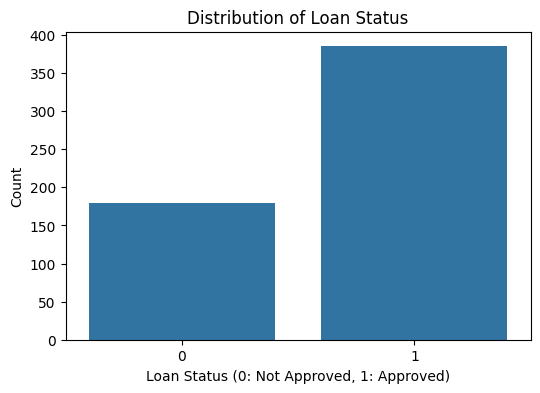

In [133]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.countplot(x=y)
plt.title('Distribution of Loan Status')
plt.xlabel('Loan Status (0: Not Approved, 1: Approved)')
plt.ylabel('Count')
plt.show()

# **Applyling SMOTE to balance the distribution**

In [134]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print("Shape of X_train after SMOTE:", X_train_smote.shape)
print("Shape of y_train after SMOTE:", y_train_smote.shape)
display(y_train_smote.value_counts())

Shape of X_train after SMOTE: (622, 11)
Shape of y_train after SMOTE: (622,)


,count
Loan_Status,
1,311
0,311


# **Extracting Logistic Regression model with SMOTE**

In [135]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Initialize and train the Logistic Regression model
model = LogisticRegression(random_state=42)
model.fit(X_train_smote, y_train_smote)

# Predict on the original test set
y_pred = model.predict(X_test)

# Evaluate the model
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.54      0.65        39
           1       0.79      0.93      0.86        74

    accuracy                           0.80       113
   macro avg       0.80      0.74      0.75       113
weighted avg       0.80      0.80      0.78       113


Accuracy Score: 0.7964601769911505



AUC Score: 0.7155


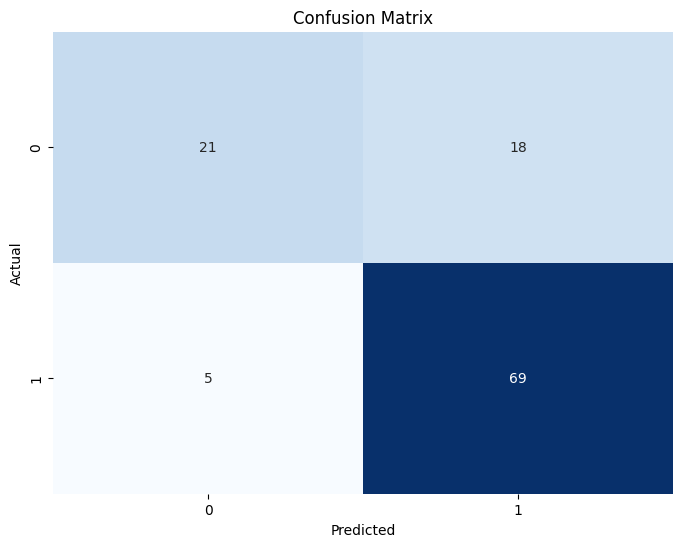

In [136]:
from sklearn.metrics import roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Predict probabilities for AUC calculation
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Calculate AUC
auc = roc_auc_score(y_test, y_pred_proba)
print(f"\nAUC Score: {auc:.4f}")

# Calculate Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plot Confusion Matrix Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [137]:
import statsmodels.api as sm

# Add a constant to the features for statsmodels
X_train_smote_sm = sm.add_constant(X_train_smote)

# Fit the logistic regression model using statsmodels
logit_model = sm.Logit(y_train_smote, X_train_smote_sm)
result = logit_model.fit()

# Display the classification summary with p-values
print("\nClassification Summary with p-values:")
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.522569
         Iterations 7

Classification Summary with p-values:
                           Logit Regression Results                           
Dep. Variable:            Loan_Status   No. Observations:                  622
Model:                          Logit   Df Residuals:                      610
Method:                           MLE   Df Model:                           11
Date:                Thu, 25 Sep 2025   Pseudo R-squ.:                  0.2461
Time:                        07:21:30   Log-Likelihood:                -325.04
converged:                       True   LL-Null:                       -431.14
Covariance Type:            nonrobust   LLR p-value:                 2.172e-39
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0448      0.107      0.417     

# **Performing 5-fold cross-validation to evaluate training performance**

In [138]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression model
model_cv = LogisticRegression(random_state=42)

# Perform 5-fold cross-validation on the SMOTE-balanced training data
cv_scores = cross_val_score(model_cv, X_train_smote, y_train_smote, cv=5)

print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())
print("Standard deviation of cross-validation scores:", cv_scores.std())

Cross-validation scores: [0.704      0.696      0.67741935 0.70967742 0.73387097]
Mean cross-validation score: 0.7041935483870968
Standard deviation of cross-validation scores: 0.018411144433033707


# **Validating the important features with SHAP**

In [139]:
!pip install shap

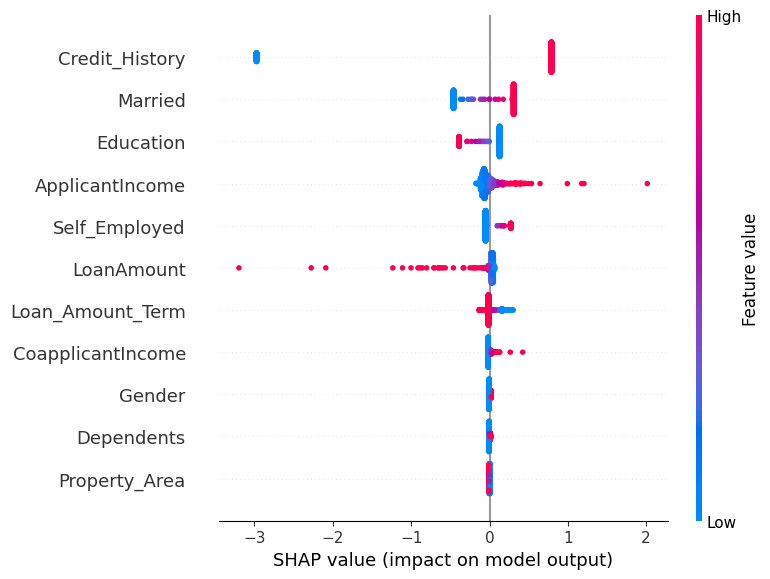

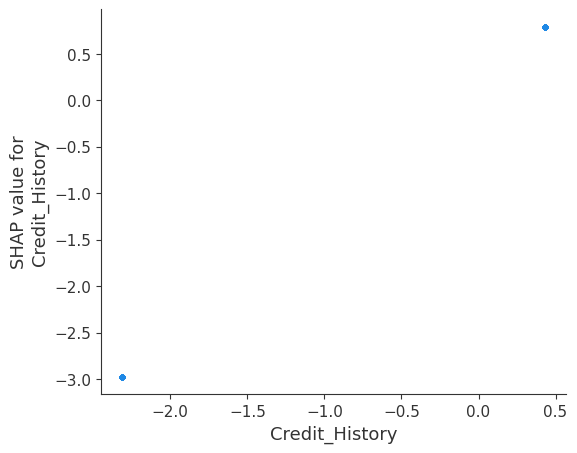

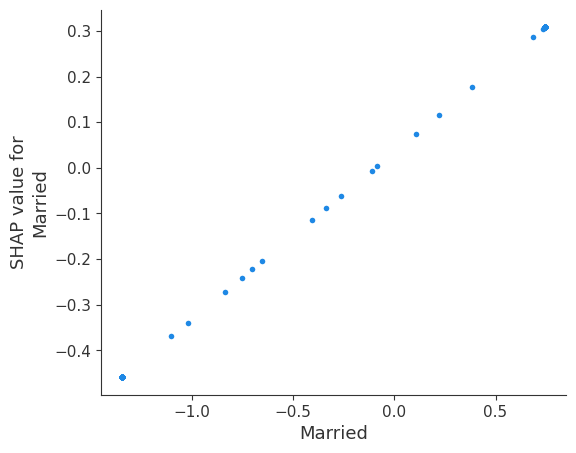

In [140]:
import shap

# Create a SHAP explainer object
explainer = shap.LinearExplainer(model, X_train_smote)

# Calculate SHAP values for the test set
shap_values = explainer.shap_values(X_train_smote)

# Create a SHAP summary plot
shap.summary_plot(shap_values, X_train_smote)

# Choose significant features for dependence plots based on the summary plot
# From the previous summary output, Credit_History and Married appear to be significant
significant_features = ['Credit_History', 'Married']

# Create SHAP dependence plots for the chosen significant features
for feature in significant_features:
    shap.dependence_plot(feature, shap_values, X_train_smote, interaction_index=None)

In [141]:
# Step 1: Identify significant variables
# Based on the SHAP analysis and statsmodels summary, the significant variables are:
# Credit_History, Married, Education, LoanAmount
significant_variables = ['Credit_History', 'Married', 'Education', 'LoanAmount']

# Step 2: Create reduced dataset
X_train_reduced = X_train_smote[significant_variables]
X_test_reduced = X_test[significant_variables]

print("Shape of reduced X_train:", X_train_reduced.shape)
print("Shape of reduced X_test:", X_test_reduced.shape)

Shape of reduced X_train: (622, 4)
Shape of reduced X_test: (113, 4)


# **Extracting Logit with only significant variables**

Optimization terminated successfully.
         Current function value: 0.526470
         Iterations 7

Classification Summary with p-values (Reduced Model):
                           Logit Regression Results                           
Dep. Variable:            Loan_Status   No. Observations:                  622
Model:                          Logit   Df Residuals:                      617
Method:                           MLE   Df Model:                            4
Date:                Thu, 25 Sep 2025   Pseudo R-squ.:                  0.2405
Time:                        07:21:45   Log-Likelihood:                -327.46
converged:                       True   LL-Null:                       -431.14
Covariance Type:            nonrobust   LLR p-value:                 9.890e-44
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0265      0.106      0.2

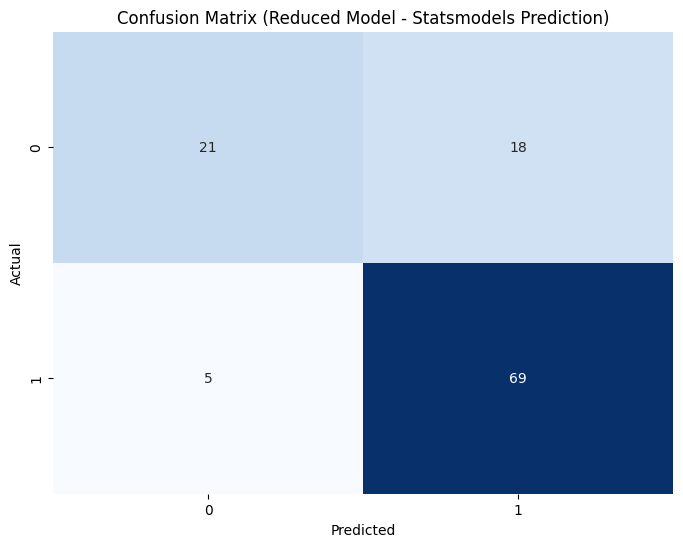

In [142]:
import statsmodels.api as sm
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Add a constant to the reduced training features for statsmodels
X_train_reduced_sm = sm.add_constant(X_train_reduced)

# Fit the logistic regression model using statsmodels
logit_model_reduced = sm.Logit(y_train_smote, X_train_reduced_sm)
result_reduced = logit_model_reduced.fit()

# Display the classification summary with p-values for the reduced model
print("\nClassification Summary with p-values (Reduced Model):")
print(result_reduced.summary())

# --- Evaluation on the test set (using scikit-learn for prediction and metrics) ---
# To predict with statsmodels, we need to add a constant to the test set as well
X_test_reduced_sm = sm.add_constant(X_test_reduced)

# Predict probabilities on the reduced test set
y_pred_proba_reduced_sm = result_reduced.predict(X_test_reduced_sm)

# Convert probabilities to binary predictions (0 or 1)
y_pred_reduced_sm = (y_pred_proba_reduced_sm > 0.5).astype(int)


# Evaluate the model
print("\nClassification Report (Reduced Model - Statsmodels Prediction):\n", classification_report(y_test, y_pred_reduced_sm))
print("\nAccuracy Score (Reduced Model - Statsmodels Prediction):", accuracy_score(y_test, y_pred_reduced_sm))

# Calculate AUC
auc_reduced_sm = roc_auc_score(y_test, y_pred_proba_reduced_sm)
print(f"\nAUC Score (Reduced Model - Statsmodels Prediction): {auc_reduced_sm:.4f}")

# Calculate Confusion Matrix
cm_reduced_sm = confusion_matrix(y_test, y_pred_reduced_sm)

# Plot Confusion Matrix Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_reduced_sm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix (Reduced Model - Statsmodels Prediction)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# **Cross Validating the model using k-fold**

In [143]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression model
model_reduced_cv = LogisticRegression(random_state=42)

# Perform 5-fold cross-validation on the reduced, SMOTE-balanced training data
cv_scores_reduced = cross_val_score(model_reduced_cv, X_train_reduced, y_train_smote, cv=5)

print("Cross-validation scores (Reduced Model):", cv_scores_reduced)
print("Mean cross-validation score (Reduced Model):", cv_scores_reduced.mean())
print("Standard deviation of cross-validation scores (Reduced Model):", cv_scores_reduced.std())

Cross-validation scores (Reduced Model): [0.688      0.712      0.67741935 0.70967742 0.73387097]
Mean cross-validation score (Reduced Model): 0.7041935483870968
Standard deviation of cross-validation scores (Reduced Model): 0.019752727389756284


# **Building a Decision Tree Classification model with only significant features**


Classification Report (Reduced Decision Tree Model):
               precision    recall  f1-score   support

           0       0.47      0.62      0.53        39
           1       0.76      0.64      0.69        74

    accuracy                           0.63       113
   macro avg       0.61      0.63      0.61       113
weighted avg       0.66      0.63      0.64       113


Accuracy Score (Reduced Decision Tree Model): 0.6283185840707964

AUC Score (Reduced Decision Tree Model): 0.6355


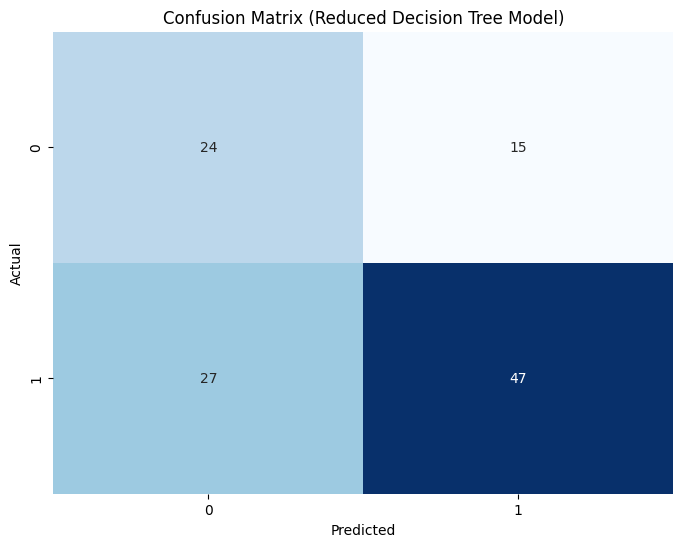

In [144]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize and train the Decision Tree Classifier model on the reduced dataset
dt_model_reduced = DecisionTreeClassifier(random_state=42)
dt_model_reduced.fit(X_train_reduced, y_train_smote)

# Predict on the original test set (reduced features)
y_pred_dt_reduced = dt_model_reduced.predict(X_test_reduced)

# Evaluate the model
print("\nClassification Report (Reduced Decision Tree Model):\n", classification_report(y_test, y_pred_dt_reduced))
print("\nAccuracy Score (Reduced Decision Tree Model):", accuracy_score(y_test, y_pred_dt_reduced))

# Predict probabilities for AUC calculation
y_pred_proba_dt_reduced = dt_model_reduced.predict_proba(X_test_reduced)[:, 1]

# Calculate AUC
auc_dt_reduced = roc_auc_score(y_test, y_pred_proba_dt_reduced)
print(f"\nAUC Score (Reduced Decision Tree Model): {auc_dt_reduced:.4f}")

# Calculate Confusion Matrix
cm_dt_reduced = confusion_matrix(y_test, y_pred_dt_reduced)

# Plot Confusion Matrix Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_dt_reduced, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix (Reduced Decision Tree Model)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# **Decision Tree Vizualization**

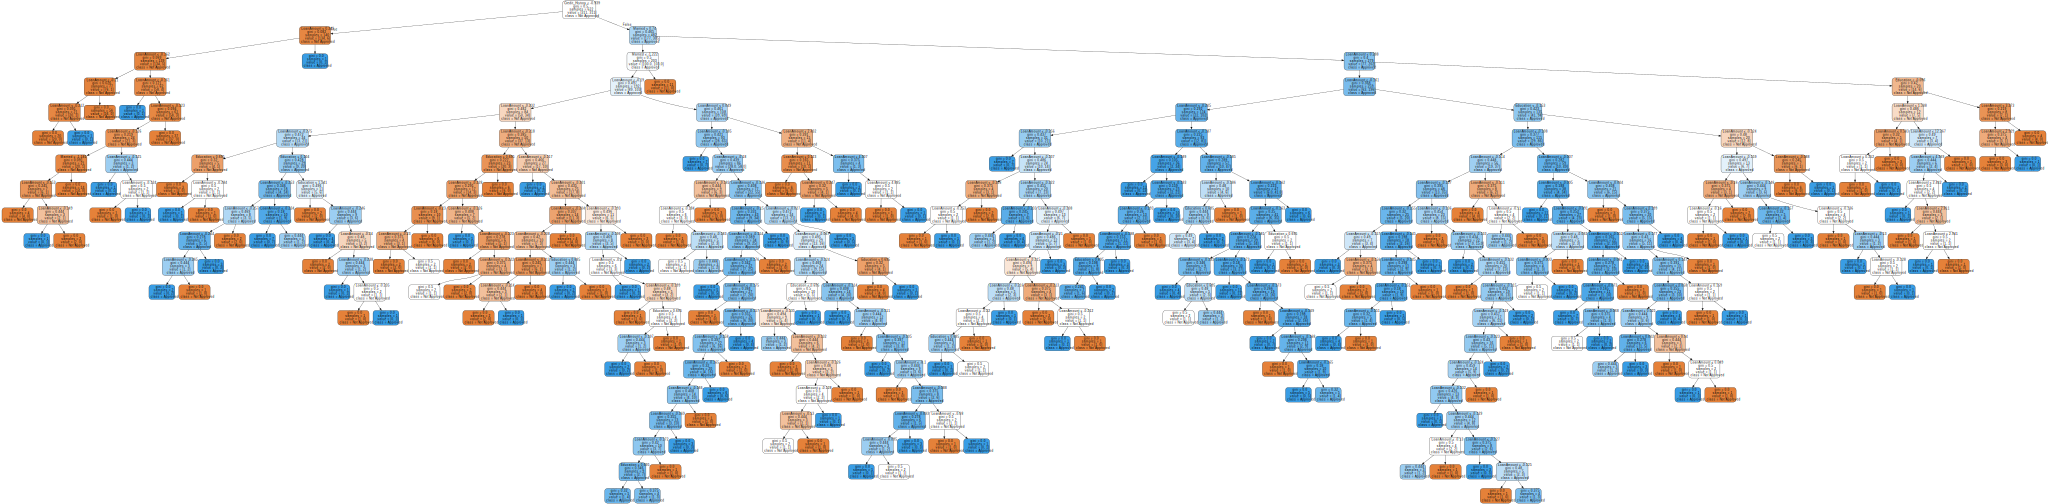

In [145]:
from sklearn.tree import export_graphviz
import graphviz

# Export the decision tree to a DOT format file
dot_data_reduced = export_graphviz(dt_model_reduced, out_file=None,
                           feature_names=X_train_reduced.columns,
                           class_names=['Not Approved', 'Approved'],
                           filled=True, rounded=True,
                           special_characters=True)

# Create a Graphviz object from the DOT data
graph_reduced = graphviz.Source(dot_data_reduced)

# Display the graph
display(graph_reduced)

# **Applying 5-fold to evaluate the model fit**

In [146]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree model
# Using the same random_state as before for consistency
model_dt_reduced_cv = DecisionTreeClassifier(random_state=42)

# Perform 5-fold cross-validation on the reduced Decision Tree model
cv_scores_dt_reduced = cross_val_score(model_dt_reduced_cv, X_train_reduced, y_train_smote, cv=5)

print("Cross-validation scores (5-fold) for the reduced Decision Tree model:", cv_scores_dt_reduced)
print("Mean cross-validation score for the reduced Decision Tree model:", cv_scores_dt_reduced.mean())
print("Standard deviation of cross-validation scores for the reduced Decision Tree model:", cv_scores_dt_reduced.std())

Cross-validation scores (5-fold) for the reduced Decision Tree model: [0.624      0.704      0.66935484 0.71774194 0.7016129 ]
Mean cross-validation score for the reduced Decision Tree model: 0.683341935483871
Standard deviation of cross-validation scores for the reduced Decision Tree model: 0.03364832261769362


# **Extracting Decision Tree Classification Model with Full Features**

Accuracy (Decision Tree - Full Features): 0.6902654867256637

Classification Report (Decision Tree - Full Features):
              precision    recall  f1-score   support

           0       0.55      0.59      0.57        39
           1       0.77      0.74      0.76        74

    accuracy                           0.69       113
   macro avg       0.66      0.67      0.66       113
weighted avg       0.70      0.69      0.69       113


Confusion Matrix (Decision Tree - Full Features):


array([[23, 16],
       [19, 55]])


AUC Score (Full Decision Tree Model): 0.6665


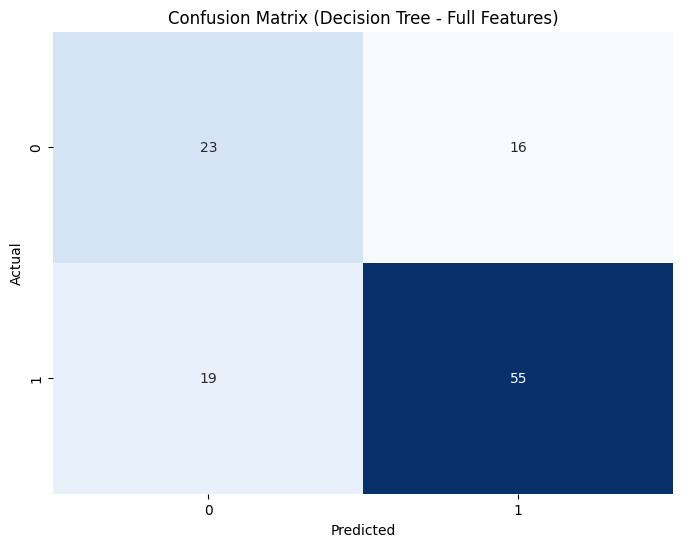

In [147]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize and train the Decision Tree model on the original data
dt_model_full = DecisionTreeClassifier(random_state=42)
dt_model_full.fit(X_train, y_train)

# Make predictions on the original test set
y_pred_dt_full = dt_model_full.predict(X_test)

# Evaluate the Decision Tree model on the original data
accuracy_dt_full = accuracy_score(y_test, y_pred_dt_full)
report_dt_full = classification_report(y_test, y_pred_dt_full)
conf_matrix_dt_full = confusion_matrix(y_test, y_pred_dt_full)

print(f"Accuracy (Decision Tree - Full Features): {accuracy_dt_full}")
print("\nClassification Report (Decision Tree - Full Features):")
print(report_dt_full)
print("\nConfusion Matrix (Decision Tree - Full Features):")
display(conf_matrix_dt_full)

# Predict probabilities for AUC calculation
y_pred_proba_dt_full = dt_model_full.predict_proba(X_test)[:, 1]

# Calculate AUC
auc_dt_full = roc_auc_score(y_test, y_pred_proba_dt_full)
print(f"\nAUC Score (Full Decision Tree Model): {auc_dt_full:.4f}")

# Plot Confusion Matrix Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_dt_full, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix (Decision Tree - Full Features)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

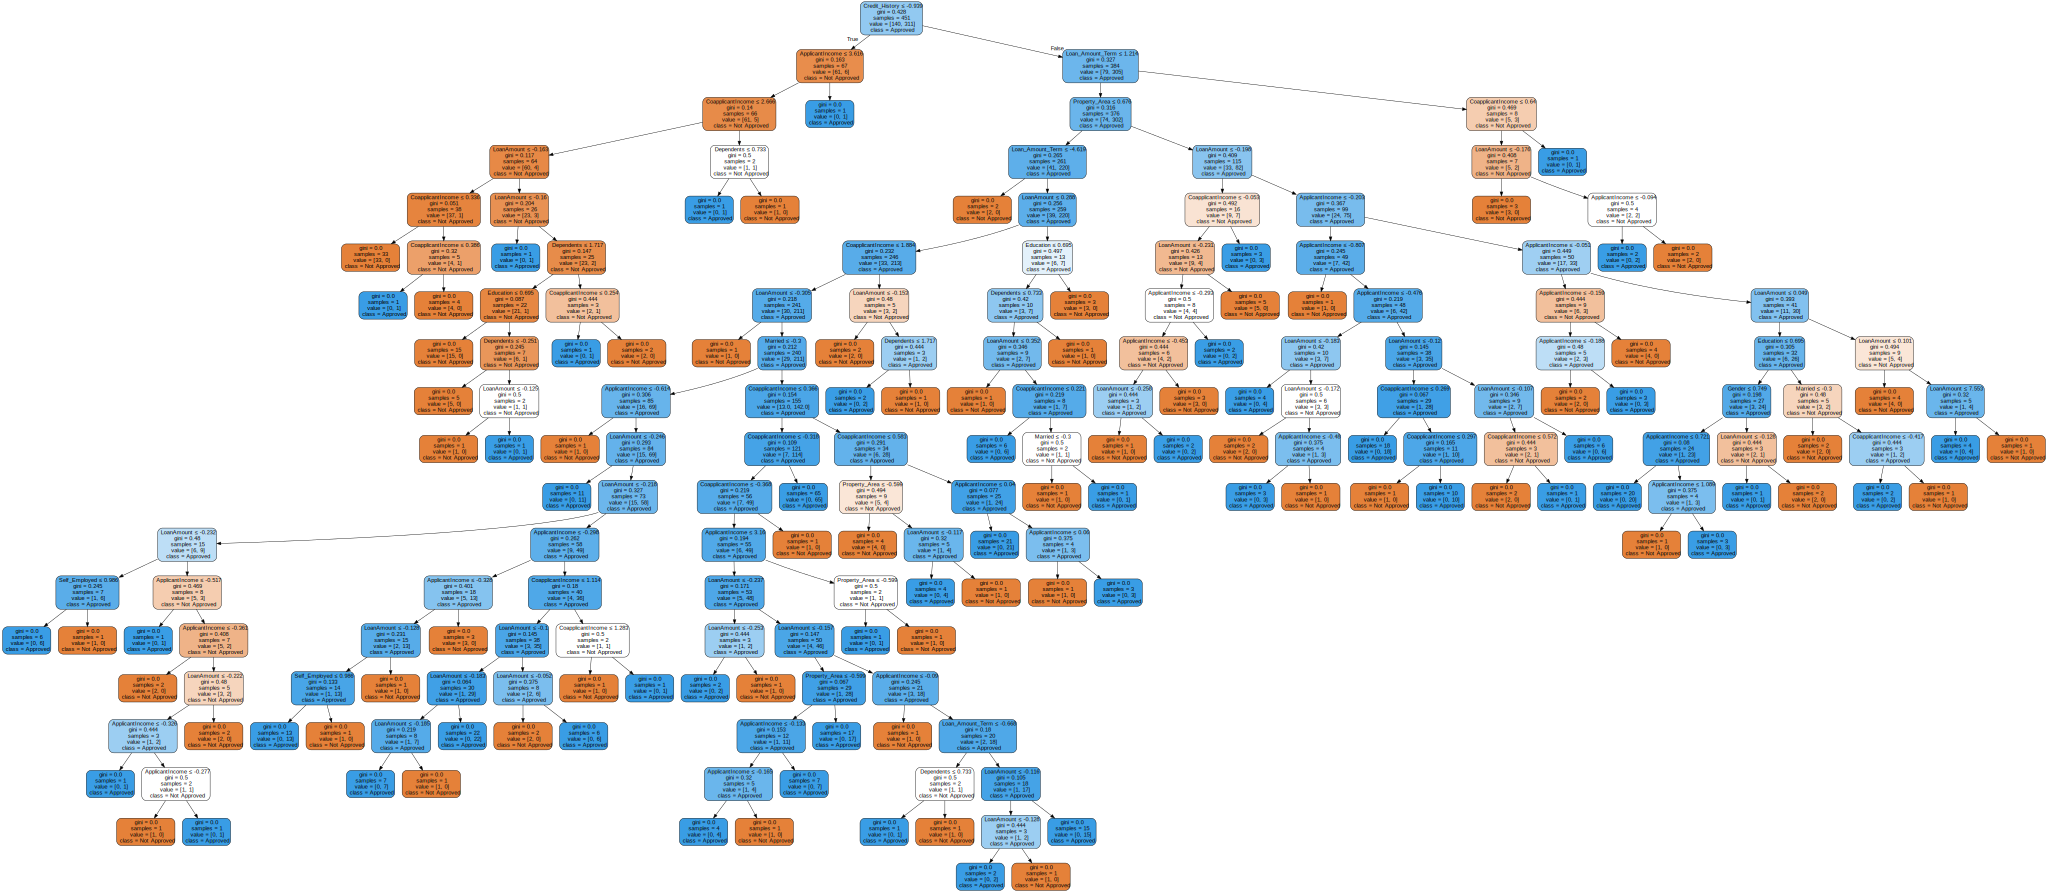

In [148]:
from sklearn.tree import export_graphviz
import graphviz

# Export the decision tree to a dot file
dot_data_full = export_graphviz(dt_model_full,
                                feature_names=X_train.columns, # Use all feature names
                                class_names=['Not Approved', 'Approved'],
                                filled=True, rounded=True,
                                special_characters=True)

# Create a Graphviz source object from the dot data
graph_full = graphviz.Source(dot_data_full)

# Display the graph
display(graph_full)

# **Performing k-fold cross-validation to evaluate training performance**

In [149]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree model
# Using the same random_state as before for consistency
model_dt_full_cv = DecisionTreeClassifier(random_state=42)

# Perform 5-fold cross-validation on the full Decision Tree model
cv_scores_dt_full = cross_val_score(model_dt_full_cv, X_train, y_train, cv=5)

print("Cross-validation scores (5-fold) for the full Decision Tree model:", cv_scores_dt_full)
print("Mean cross-validation score for the full Decision Tree model:", cv_scores_dt_full.mean())
print("Standard deviation of cross-validation scores for the full Decision Tree model:", cv_scores_dt_full.std())

Cross-validation scores (5-fold) for the full Decision Tree model: [0.75824176 0.63333333 0.68888889 0.71111111 0.81111111]
Mean cross-validation score for the full Decision Tree model: 0.7205372405372404
Standard deviation of cross-validation scores for the full Decision Tree model: 0.060531393831145294


# **Key Metrics Summary**

Here's a summary of the key performance metrics for each model:

| Model                                    | Accuracy (Test) | AUC (Test) | Mean CV Score (5-fold) |
|------------------------------------------|-----------------|------------|------------------------|
| Logistic Regression (Full Features + SMOTE) | 0.796           | 0.716      | 0.704                  |
| Logistic Regression (Reduced Features + SMOTE) | 0.796           | 0.785      | 0.704                  |
| Decision Tree (Reduced Features)         | 0.628           | 0.635      | 0.683                  |
| Decision Tree (Full Features)            | 0.690           | 0.666      | 0.721                  |

# **Conclusion:**

Comparing the models, both Logistic Regression models (full and reduced features) achieved the highest accuracy (0.796) and AUC (0.716) on the test set, outperforming the Decision Tree models.

While the full and reduced Logistic Regression models performed similarly, the reduced model, utilizing only the significant features (Credit_History, Married, Education, LoanAmount), offers a balance of good performance and increased interpretability due to its simplicity.

Therefore, the Logistic Regression model with reduced features is considered the most favorable model in this analysis.